## Install the Pre-requisites

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/SpeakerProfiling-main/SpeakerProfile_NativeLanguage

/content/drive/MyDrive/SpeakerProfiling-main/SpeakerProfile_NativeLanguage


In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Aug 27 03:59:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [5]:
!pip install --user -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 705 kB 22.3 MB/s 
     |████████████████████████████████| 61 kB 620 kB/s 
     |████████████████████████████████| 419 kB 100.2 MB/s 
     |████████████████████████████████| 1.8 MB 89.5 MB/s 
     |████████████████████████████████| 125 kB 102.3 MB/s 
     |████████████████████████████████| 496 kB 102.3 MB/s 
     |████████████████████████████████| 5.9 MB 107.2 MB/s 
     |████████████████████████████████| 11.0 MB 81.5 MB/s 
     |████████████████████████████████| 157 kB 87.2 MB/s 
     |████████████████████████████████| 181 kB 85.4 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 157 kB 97.3 MB/s 
     |████████████████████████████████| 157 kB 110.0 MB/s 
     |████████████████████████████████| 157 kB 105.7 MB/s 
     |████████████████████████████████| 157 kB 104.3 MB/s 
     |█████████████████████

# Dataset


## Download the NISP Dataset

Edit config.py with data path or add as arguments

# Download Noise Dataset

In [ ]:
mkdir noise_dataset

In [ ]:
import wavencoder
wavencoder.utils.download_noise_dataset('noise_dataset', sample_rate='16k', download_all=True)

# Prepare NISP Dataset

In [ ]:
!python prepare_nisp_data.py 

# EDA on the NISP Datasets

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("../NISP-Dataset/total_spkrinfo.list", sep=' ')
df.head(10)

,Speaker_ID,Gender,Mother_Tongue,Height,Shoulder_size,Waist_size,Weight,Age,Native_State,Native_District
0,Hin_0001,Female,Hindi,163.0,40.0,89.5,58.5,24.24,Rajasthan,Jaipur
1,Hin_0002,Female,Hindi,154.5,36.5,72,50.9,26.06,Madhya_Pradesh,Indore
2,Hin_0003,Male,Hindi,167.5,40.5,78,56.6,21.51,Haryana,Faridabad
3,Hin_0004,Male,Hindi,176.0,43.0,91.5,77.6,21.09,Chhattisgarh,Bilaspur
4,Hin_0005,Female,Hindi,153.0,40.5,96,80.2,27.39,Uttar_Pradesh,Kanpur_Nagar
5,Hin_0006,Male,Hindi,166.0,43.0,86,61.6,25.98,Delhi,West
6,Hin_0007,Female,Hindi,178.0,44.0,88,67.8,25.31,Maharashtra,Gondiya
7,Hin_0008,Male,Hindi,179.0,44.0,94,81.8,29.72,West_Bengal,Haora
8,Hin_0009,Male,Hindi,165.0,43.0,89,70.2,24.08,Delhi,West
9,Hin_0010,Male,Hindi,165.0,42.0,79,65.0,22.79,Uttar_Pradesh,Kanpur_Nagar


In [ ]:
#Total Speakers
df.Speaker_ID.count()

345

In [ ]:
df.Gender.value_counts()

Male      219
Female    126
Name: Gender, dtype: int64

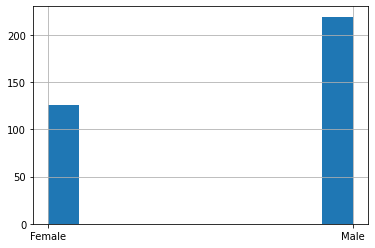

In [ ]:
# Distribution of Male and Gender Speakers
df.Gender.hist()

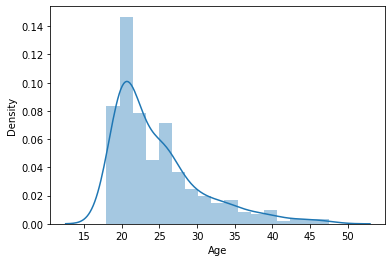

In [ ]:
# Distribution of Age across the speakers
sns.distplot(df['Age'], kde=True)
plt.show()

Gender
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

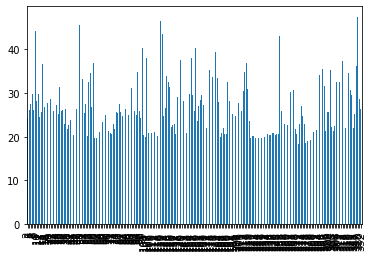

In [ ]:
# Distribution of Age group across male and female
df.groupby("Gender")['Age'].plot(kind='bar')
#df_groupby.plot(Kind='bar')


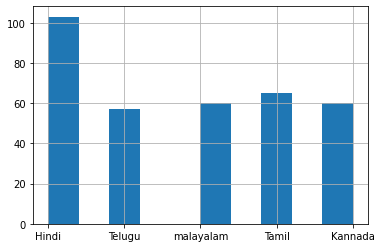

In [ ]:
# Distribution of Speakers based on Mother Tongue
df.Mother_Tongue.hist()

In [ ]:
# Distribution of Male and female based on their Mother Tongue

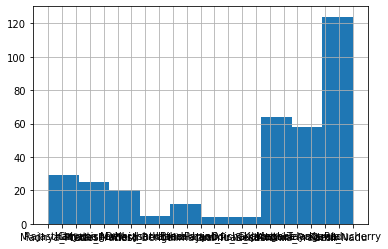

In [ ]:
# Distribution of Speakers across State
df.Native_State.hist()

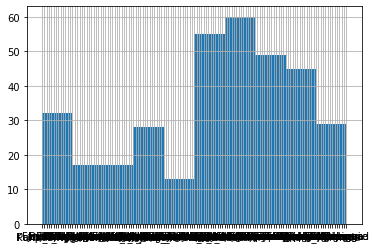

In [ ]:
# Distribution of speakers across Districts

df.Native_District.hist()

# Train, Validate and Test the Dataset

# Run the Model with Wav2Vec encoder + LSTM Attention layer 

In [6]:
!python train_nisp.py --data_path="../NISP-Dataset/Total_final_data_16k" --speaker_csv_path="../NISP-Dataset/total_spkrinfo.list" --noise_dataset_path="../noise_dataset" --n_workers=4

2022-08-26 21:47:52 | INFO | numexpr.utils | NumExpr defaulting to 8 threads.
2022-08-26 21:47:53 | INFO | torch.distributed.nn.jit.instantiator | Created a temporary directory at /tmp/tmpe3twwn35
2022-08-26 21:47:53 | INFO | torch.distributed.nn.jit.instantiator | Writing /tmp/tmpe3twwn35/_remote_module_non_scriptable.py
Training Model on NISP Dataset
#Cores = 4	#GPU = 1
Dataset Split (Train, Validation, Test)= 12933 4231 11107
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: 2
wandb: You chose 'Use an existing W&B account'
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Tracking run with wandb version 0.13

#Run the Model with SpeechBrain Fbank + Xvector + LSTM  layer

In [7]:
!python train_nisp.py --data_path="../NISP-Dataset/Total_final_data_16k" --speaker_csv_path="../NISP-Dataset/total_spkrinfo.list" --noise_dataset_path="../noise_dataset" --n_workers=4

2022-08-26 23:53:00 | INFO | numexpr.utils | NumExpr defaulting to 8 threads.
2022-08-26 23:53:01 | INFO | torch.distributed.nn.jit.instantiator | Created a temporary directory at /tmp/tmp2xw8yg7_
2022-08-26 23:53:01 | INFO | torch.distributed.nn.jit.instantiator | Writing /tmp/tmp2xw8yg7_/_remote_module_non_scriptable.py
Training Model on NISP Dataset
#Cores = 4	#GPU = 1
Dataset Split (Train, Validation, Test)= 12933 4231 11107
wandb: Currently logged in as: satish1055. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.13.2
wandb: Run data is saved locally in /content/drive/MyDrive/SpeakerProfiling-main/SpeakerProfile_NativeLanguage/wandb/run-20220826_235303-7e3svtyi
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run chocolate-silence-55
wandb: ⭐️ View project at https://wandb.ai/satish1055/SpeakerProfiling
wandb: 🚀 View run at https://wandb.ai/satish1055/SpeakerProfiling/runs/7e3svtyi
/root/.local/lib/python3.7/site-packages/torchme

#Run the Model with SpeechBrain Fbank + Xvector + LSTM layer (without Data augmentation)

In [6]:
!python train_nisp.py --data_path="../NISP-Dataset/Total_final_data_16k" --speaker_csv_path="../NISP-Dataset/total_spkrinfo.list" --noise_dataset_path="../noise_dataset" --n_workers=4

2022-08-27 04:01:01 | INFO | numexpr.utils | NumExpr defaulting to 8 threads.
2022-08-27 04:01:03 | INFO | torch.distributed.nn.jit.instantiator | Created a temporary directory at /tmp/tmp4xwqt41s
2022-08-27 04:01:03 | INFO | torch.distributed.nn.jit.instantiator | Writing /tmp/tmp4xwqt41s/_remote_module_non_scriptable.py
Training Model on NISP Dataset
#Cores = 4	#GPU = 1
Dataset Split (Train, Validation, Test)= 12933 4231 11107
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: 2
wandb: You chose 'Use an existing W&B account'
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Tracking run with wandb version 0.13

#Run the Model with Wav2Vec + CNN-LSTM+Attention layer (without Data augmentation)

In [7]:
!python train_nisp.py --data_path="../NISP-Dataset/Total_final_data_16k" --speaker_csv_path="../NISP-Dataset/total_spkrinfo.list" --noise_dataset_path="../noise_dataset" --n_workers=4

2022-08-27 04:54:36 | INFO | numexpr.utils | NumExpr defaulting to 8 threads.
2022-08-27 04:54:36 | INFO | torch.distributed.nn.jit.instantiator | Created a temporary directory at /tmp/tmpna_cv577
2022-08-27 04:54:36 | INFO | torch.distributed.nn.jit.instantiator | Writing /tmp/tmpna_cv577/_remote_module_non_scriptable.py
Training Model on NISP Dataset
#Cores = 4	#GPU = 1
Dataset Split (Train, Validation, Test)= 12933 4231 11107
wandb: Currently logged in as: satish1055. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.13.2
wandb: Run data is saved locally in /content/drive/MyDrive/SpeakerProfiling-main/SpeakerProfile_NativeLanguage/wandb/run-20220827_045438-2z22f82v
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run laced-brook-57
wandb: ⭐️ View project at https://wandb.ai/satish1055/SpeakerProfiling
wandb: 🚀 View run at https://wandb.ai/satish1055/SpeakerProfiling/runs/2z22f82v
/root/.local/lib/python3.7/site-packages/torchmetrics/